In [1]:
# Large dataset - 1 million+ rows

import pandas as pd

df = pd.read_parquet("/Users/thomassimmons/Downloads/yellow_tripdata_2023-01.parquet")

In [2]:
df.shape

(3066766, 19)

In [3]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [8]:
import matplotlib.pyplot as plt

In [10]:
cat_cols = ['VendorID', 'store_and_fwd_flag', 'payment_type', 'RatecodeID']
for col in cat_cols:
    df[col] = df[col].astype('category')
df.dtypes

VendorID                       category
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [11]:
df['passenger_count'] = pd.to_numeric(df['passenger_count'], downcast='integer')

In [12]:
df['trip_distance'] = pd.to_numeric(df['trip_distance'], downcast='float')

In [13]:
df.dtypes

VendorID                       category
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [14]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [15]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [16]:
print(df[['trip_distance','trip_duration']].describe())

       trip_distance  trip_duration
count   3.066766e+06   3.066766e+06
mean    3.847342e+00   1.566900e+01
std     2.495838e+02   4.259435e+01
min     0.000000e+00  -2.920000e+01
25%     1.060000e+00   7.116667e+00
50%     1.800000e+00   1.151667e+01
75%     3.330000e+00   1.830000e+01
max     2.589281e+05   1.002918e+04


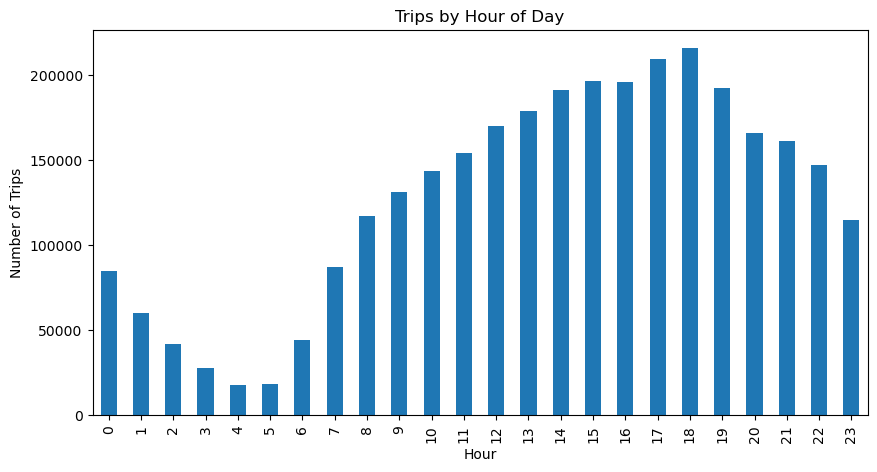

In [18]:
df['pickup_hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title="Trips by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.show()